# Modellering av jordas strålingsbalanse

Når vi lager en modell for dette systemet, er det hovedsakelig to ting vi bør ha med:
1. En modell for absorbert stråling (IR, synlig, UV) fra sola.
2. En modell for emittert stråling (IR) fra jorda.

Modellen bør være et uttrykk for endringen i overflatetemperaturen til jorda som funksjon av tida. Siden vi er interessert i endringen til enhver tid, kan vi benytte den deriverte (momentan endring).

$$T'(t) = S_{inn} - S_{ut}$$

der $S_{inn}$ er absorbert stråling og $S_{ut}$ er emittert stråling. La oss se på ulike modeller for dette.

### Antakelser 
- Jorda modelleres med en statisk albedo (refleksjonsgrad), $\alpha$. Dette begrenser tidsrommet modellen kan brukes i, da albedoen på jorda endres med tida. Mengden absorbert kortbølget stråling modelleres slik:

$$\frac{(1-\alpha)S}{4}$$

der $S \approx 1361$ W/m$^2$ er gjennomsnittlig stråling motatt fra sola i løpet av et år og $\alpha \approx 0.32$ er albedoen til jorda.

- Jorda modelleres som et svartlegeme med hensyn til utsending av stråling med lang bølgelengde, altså et legeme som absorberer all stråling som sendes mot den. Dermed følger emisjonen av langbølget stråling Stefan-Boltzmanns lov:

$$F = \epsilon \cdot \sigma \cdot T^4$$

der $\epsilon$ er emissiviteten til legemet, altså et mål på hvor mye legemet oppfører seg som et svartlegeme. For et fullstendig svartlegeme er $\epsilon = 1$, for et perfekt speil er $\epsilon = 0$. Stefan-Boltzmann-konstanten $\sigma = 5.67\cdot 10^{-8}$ Wm$^{-2}$K$^-4$, og $T$ er den gjennomsnittlige temperaturen på overflaten til jorda.

- Overflatetemperaturen blir tilnærmet som en planet med 70 % vann med gjennomsnittlig dybde på 70 meter. Varmekapasiteten til jorda kan da beregnes til å være $C = 2.08\cdot 10^8$ JK$^{-1}$m$^{-2}$.

### Totalmodell

Vi ønsker å finne overflatetemperaturen til jorda som funksjon av tid, $T_s(t)$. Vi kan formulere en modell for *endringen* i overflatetemperatur ved hjelp av modellene vi har gjort rede for.

$$T'(t) = S_{inn} - S_{ut} = \frac{1}{C}\left( \frac{(1-\alpha)S}{4} - \epsilon \cdot \sigma \cdot T^4 \right)$$

som er en differensiallikning der $T(t)$ er den ukjente.


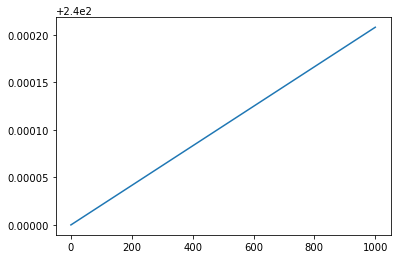

In [4]:
from pylab import *

T0 = 240
epsilon = 1
sigma = 5.67E-8
C = 2.08E8
S = 1361
alpha = 0.32

#Tidsparametre
tid = 1000 # år
dt = 1E-3
N = int(tid/dt)

T = zeros(N+1)
t = zeros(N+1)
T[0] = T0

for i in range(N):
    Tder = (1/C)*((1-alpha)*S/4 - epsilon*sigma*T[i]**4)
    T[i+1] = T[i] + Tder*dt
    t[i+1] = t[i] + dt

plot(t,T)
show()

In [ ]:
N = 100            #antall steg
sigma = 5.67E-8    #Stefan-Boltzmanns konstant

Rjord = 0.3    #andel reflektert av jorda
Ratm = 0.4    #andel reflektert av atmosfæren tilbake til jorda

UatmTrans = 340       #utstrålingstetthet fra sola transmittert gjennom atmosfæren, W/m^2
UjordRef = zeros(N)   #utstrålingstetthet reflektert av jordoverflaten
UjordEmit = zeros(N)  #utstrålingstetthet emittert av jordoverflaten pga temperatur
UatmRef = zeros(N)    #utstrålingstetthet reflektert av atmosfæren tilbake til jorda
UjordAbs = zeros(N)   #utstrålingstetthet absorbert av jordoverflaten

T = zeros(N)        #jordas temperatur

#startverdier: ingen drivhuseffekt
UjordAbs[0] = UatmTrans*(1-Rjord)
UjordEmit[0] = UjordAbs[0]
T[0] = (UjordAbs[0]/sigma)**(1/4)

for i in range(N-1):
    #starter drivhuseffekten
    UatmRef[i+1] = (UjordRef[i] + UjordEmit[i])*Ratm
    UjordRef[i+1] = (UatmTrans + UatmRef[i])*Rjord
    UjordAbs[i+1] = UatmTrans + UatmRef[i] - UjordRef[i+1]
    UjordEmit[i+1] = UjordAbs[i]
    
    T[i+1] = (UjordAbs[i+1]/sigma)**(1/4)      #Stefan-Boltzmanns lov
   
    #lineær økning av atmosfærens reflektivitet i 10 steg
    if i > 40 and i < 50:
        Ratm += 0.005

plot(T-273)
plot(40,T[40]-273,'.')
plot(50,T[50]-273,'.')
legend(['global temperatur', 'starter utslipp', 'stopper utslipp'])
xlabel('steg')
ylabel('$^\circ C$')
title('Gjennomsnittlig global temperatur')
